## 说明

请按照填空顺序编号分别完成 参数优化，不同基函数的实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(filename):
    """载入数据。"""
    xys = []
    with open(filename, 'r') as f:
        for line in f:
            xys.append(map(float, line.strip().split()))
        xs, ys = zip(*xys)
        return np.asarray(xs), np.asarray(ys)

## 不同的基函数 (basis function)的实现 填空顺序 2

请分别在这里实现“多项式基函数”以及“高斯基函数”

其中以及训练集的x的范围在0-25之间

In [89]:
def identity_basis(x):
    ret = np.expand_dims(x, axis=1)
    return ret

def multinomial_basis(x, feature_num=10):
    '''多项式基函数'''
    x = np.expand_dims(x, axis=1) # shape(N, 1)
    #==========
    #todo '''请实现多项式基函数'''
    #==========
    feat = [x]
    for i in range(2, feature_num+1):
        feat.append(x**i)
    ret = np.concatenate(feat, axis=1)
#     ret = None
    return ret

def gaussian_basis(x, feature_num=30):
    '''高斯基函数'''
    #==========
    #todo '''请实现高斯基函数'''
    #==========
#     centers = np.linspace(0, 25, feature_num)
#     width = 1.0 * (centers[1] - centers[0])
#     x = np.expand_dims(x, axis=1)
#     x = np.concatenate([x]*feature_num, axis=1)
    
#     out = (x-centers)/width
#     ret = np.exp(-0.5 * out ** 2)

    x = np.expand_dims(x, axis=1)
    x = np.concatenate([x]*feature_num, axis=1)
    ret = np.exp(-0.5 * (x-np.arange(feature_num)) ** 2)
    return ret

def triangle_basis(x):
    '''三角基函数'''
    x = np.expand_dims(x, axis=1)
    feat = [x]
    for f in (np.sin, np.cos,):
        feat.append(f(x))
    ret = np.concatenate(feat, axis=1)
    return ret

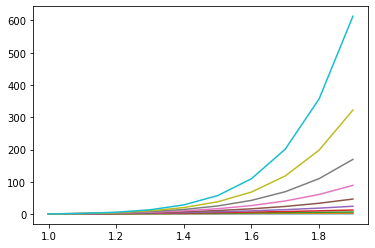

In [34]:
x = np.arange(1, 2, 0.1)
ret = multinomial_basis(x)
for r in ret.T:
    plt.plot(x, r)
plt.show()

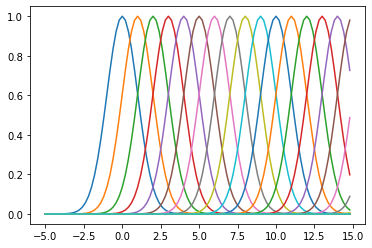

In [51]:
x = np.arange(-5, 15, 0.2)
ret = gaussian_basis(x)
for r in ret.T:
    plt.plot(x, r)
plt.show()

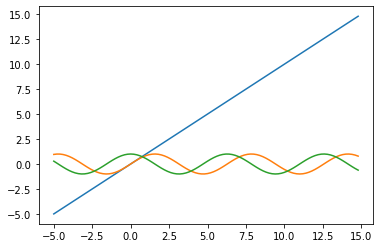

In [90]:
x = np.arange(-5, 15, 0.2)
ret = triangle_basis(x)
for r in ret.T:
    plt.plot(x, r)
plt.show()

## 返回一个训练好的模型 填空顺序 1 用最小二乘法进行模型优化 
## 填空顺序 3 用梯度下降进行模型优化
> 先完成最小二乘法的优化 (参考书中第二章 2.3中的公式)

> 再完成梯度下降的优化   (参考书中第二章 2.3中的公式)

在main中利用训练集训练好模型的参数，并且返回一个训练好的模型。

计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w

In [146]:
def main(x_train, y_train):
    """
    训练模型，并返回从x到y的映射。
    
    """
    basis_func = triangle_basis
    phi0 = np.expand_dims(np.ones_like(x_train), axis=1)
    phi1 = basis_func(x_train)
    phi = np.concatenate([phi0, phi1], axis=1)
    
    
    #==========
    #todo '''计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w'''
    #==========
    # 最小二乘法
    # w = np.linalg.pinv(phi).dot(y_train)
    # 梯度下降
    lr = 0.001
    w = 0.01 * np.random.random(phi.shape[1:])
    print(w)
    for i in range(5000):
        dw = phi.T.dot(y_train - np.dot(phi, w))
        w += lr * dw/np.mean(np.abs(dw))
        # if i%1000 == 0:
        #     print(i, dw, w)
    print(w)
    
    def f(x):
        phi0 = np.expand_dims(np.ones_like(x), axis=1)
        phi1 = basis_func(x)
        phi = np.concatenate([phi0, phi1], axis=1)
        y = np.dot(phi, w)
        return y

    return f

In [147]:
phi.T.dot(np.dot(phi, w))

array([ 35, 125])

## 评估结果 
> 没有需要填写的代码，但是建议读懂

(300,)
(200,)
[0.00705504 0.00491337 0.00101754 0.00636467]
0 [ 3593.80493162 57806.39955571   152.39624034  -122.25434297] [0.00728812 0.00866247 0.00102743 0.00635674]
1000 [-3.68346979 55.85603141 50.35669376  1.79376603] [ 0.17055788  0.98874774  2.62542184 -0.02779306]
2000 [ -11.14970743 -178.55339058    0.89588333    0.33907798] [ 2.45019184e-03  9.99119841e-01  2.99936187e+00 -1.42827234e-04]
3000 [  6.55884927 106.92792201  -0.50473334  -0.19597255] [ 2.23159463e-04  1.00193243e+00  2.99996563e+00 -9.50871132e-06]
4000 [  6.16140547 100.3400971   -0.47525622  -0.18426306] [ 1.34026162e-04  1.00204946e+00  2.99998848e+00 -4.46030738e-06]
[-1.03216845e-04  9.98313584e-01  3.00000808e+00  2.82730981e-06]
训练集预测值与真实值的标准差：0.0
预测值与真实值的标准差：0.0


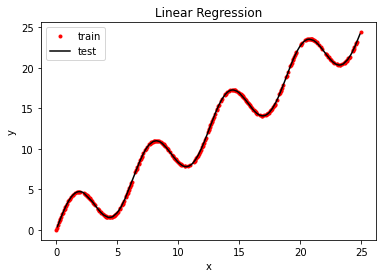

In [148]:
def evaluate(ys, ys_pred):
    """评估模型。"""
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std

# 程序主入口（建议不要改动以下函数的接口）
if __name__ == '__main__':
    train_file = 'train.txt'
    test_file = 'test.txt'
    # 载入数据
    x_train, y_train = load_data(train_file)
    x_test, y_test = load_data(test_file)
    print(x_train.shape)
    print(x_test.shape)

    # 使用线性回归训练模型，返回一个函数f()使得y = f(x)
    f = main(x_train, y_train)

    y_train_pred = f(x_train)
    std = evaluate(y_train, y_train_pred)
    print('训练集预测值与真实值的标准差：{:.1f}'.format(std))
    
    # 计算预测的输出值
    y_test_pred = f(x_test)
    # 使用测试集评估模型
    std = evaluate(y_test, y_test_pred)
    print('预测值与真实值的标准差：{:.1f}'.format(std))

    #显示结果
    plt.plot(x_train, y_train, 'ro', markersize=3)
#     plt.plot(x_test, y_test, 'k')
    plt.plot(x_test, y_test_pred, 'k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend(['train', 'test', 'pred'])
    plt.show()